Throughout this Notebook CIFAR10 Dataset is used. You can find the dataset in the following link as well.

[CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)|

# Part 1

In this part a Linear Classifier is implemented with the score function of *f(x)=Wx+b* and Mean Squared Error is used as the loss function.


a.   Implement gradient descent and run for 300 epochs

b.   Show the weights matrix W as 10 images.

c.   Report the (initial) learning rate, training and testing loss and accuracies

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
def find_accuracy(pred,labels):
    pred_class = np.argmax(pred, axis=1)
    ground_truth = np.argmax(labels, axis=1)
    accurate_pred = [pred_class == ground_truth]
    return 100*np.sum(accurate_pred)/len(ground_truth)

def MSE_with_reg(y_pred, ground_truth, batch_size,reg, weights):
  loss = 1./(batch_size*2)*np.square(y_pred-ground_truth).sum() + reg/(batch_size*2)*np.sum([np.sum(w*w) for w in weights])
  return loss;

In [4]:
def LinearClassifier(batch_size = 50000,val_batch_size=10000, epochs = 300, lr = 0.01, lr_decay = 0.999, reg = 1.2):

  std=1e-5
  w1 = std*np.random.randn(Din, K)
  b1 = np.zeros(K)

  train_loss_history = []
  val_loss_history = []
  train_acc_history = []
  val_acc_history = []
  seed = 0
  rng = np.random.default_rng(seed=seed)

  for epoch in range(1,epochs+1):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    x = x_train[indices]
    y = y_train[indices]

    y_pred = x.dot(w1)+b1

    train_loss = MSE_with_reg(y_pred,y,batch_size,reg,[w1])
    train_loss_history.append(train_loss)
    train_acc = find_accuracy(y_pred, y)
    train_acc_history.append(train_acc)
    
    y_val = x_test.dot(w1) + b1
    val_loss = MSE_with_reg(y_val,y_test,val_batch_size, reg = 0, weights=[])
    val_loss_history.append(val_loss)
    val_acc = find_accuracy(y_val, y_test)
    val_acc_history.append(val_acc)


    dw1 = 1./batch_size*(x.T.dot(y_pred - y)) + 1./batch_size*reg*w1
    w1 -= lr*dw1

    db1 = 1./batch_size*((y_pred-y).sum(axis =0))
    b1 -= lr*db1

    lr *= lr_decay

    if epoch%10 ==0 or epoch == epochs:
      print('Epoch %d/%d: Train Loss: %f, Val Loss: %f,  Training Accuracy: %f, Validation Accuracy: %f'%(epoch, epochs,train_loss, val_loss, train_acc, val_acc))


  return (train_loss_history, val_loss_history, train_acc_history, val_acc_history, w1);


In [5]:
History = LinearClassifier()

Epoch 10/300: Train Loss: 0.461788, Val Loss: 0.461411,  Training Accuracy: 31.024000, Validation Accuracy: 31.190000
Epoch 20/300: Train Loss: 0.447516, Val Loss: 0.447238,  Training Accuracy: 33.914000, Validation Accuracy: 34.080000
Epoch 30/300: Train Loss: 0.438011, Val Loss: 0.437809,  Training Accuracy: 35.442000, Validation Accuracy: 35.120000
Epoch 40/300: Train Loss: 0.430862, Val Loss: 0.430717,  Training Accuracy: 36.368000, Validation Accuracy: 36.080000
Epoch 50/300: Train Loss: 0.425228, Val Loss: 0.425130,  Training Accuracy: 36.818000, Validation Accuracy: 37.020000
Epoch 60/300: Train Loss: 0.420685, Val Loss: 0.420630,  Training Accuracy: 37.344000, Validation Accuracy: 37.330000
Epoch 70/300: Train Loss: 0.416973, Val Loss: 0.416957,  Training Accuracy: 37.652000, Validation Accuracy: 37.710000
Epoch 80/300: Train Loss: 0.413913, Val Loss: 0.413935,  Training Accuracy: 37.978000, Validation Accuracy: 37.980000
Epoch 90/300: Train Loss: 0.411371, Val Loss: 0.411430, 

In [6]:
mean_train_loss = sum(History[0])/len(History[0])
mean_val_loss =sum(History[1])/len(History[1])
mean_train_acc =sum(History[2])/len(History[2])
mean_val_acc =sum(History[3])/len(History[3])
print('Average Train Loss: %f, Average Val Loss: %f,  Average Training Accuracy: %f, Average Validation Accuracy: %f'%(mean_train_loss, mean_val_loss, mean_train_acc, mean_val_acc))


Average Train Loss: 0.410668, Average Val Loss: 0.410935,  Average Training Accuracy: 38.315847, Average Validation Accuracy: 38.028500


In [ ]:
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(25,10))
items = {"Training Loss":History[0], "Validation Loss":History[1], "Training Accuracy":History[2], "Validation Accuracy": History[3]}

plt.subplot(1,2,1);
plt.plot(items['Training Loss'], color ='r', linewidth=1, label ='Training Loss');
plt.plot(items['Validation Loss'], color ='b', linewidth=1, label = 'Validation Loss');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend(loc='upper right');

plt.subplot(1,2,2);
plt.plot(items['Training Accuracy'], color ='r', linewidth=1, label ='Training Accuracy');
plt.plot(items['Validation Accuracy'], color ='b', linewidth=1, label = 'Validation Accuracy');
plt.xlabel('Epoch');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.show()

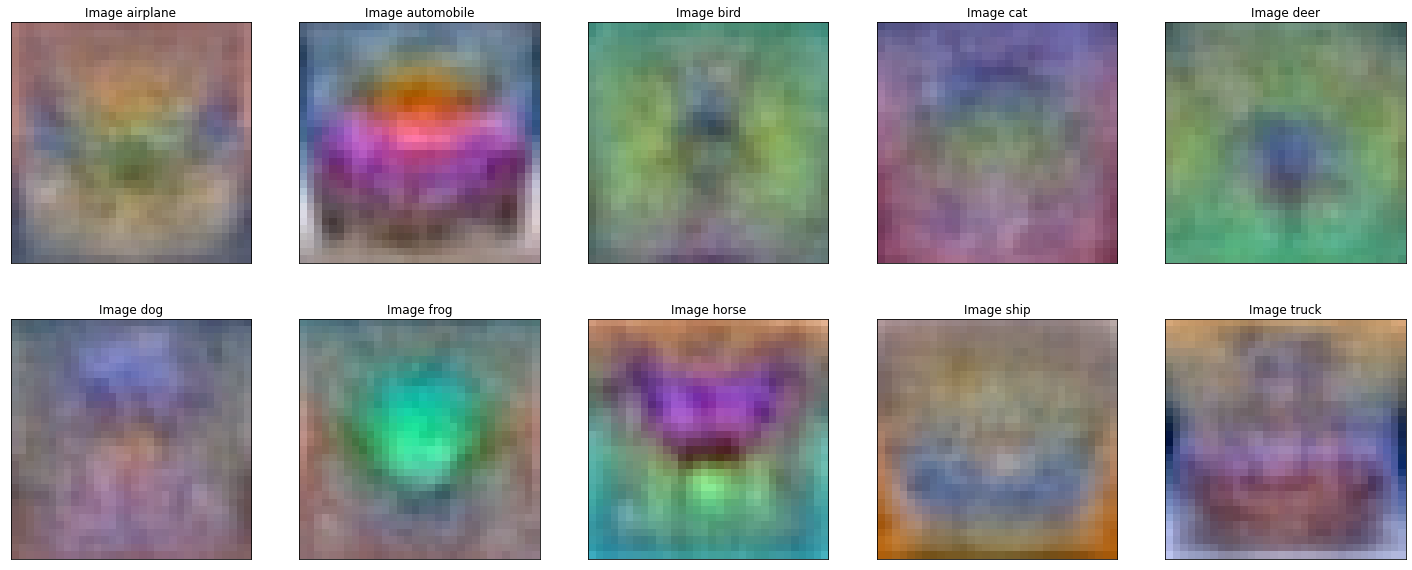

In [7]:
w1 = History[4]
w1 =  w1- np.min(w1)
images = ((w1/np.max(w1))*255).astype('uint8')
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
j = 1 
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,j),plt.imshow(image[:,:,::-1])
    plt.title("Image "+ classes[i]),
    plt.xticks([])
    plt.yticks([])      
    j+=1

plt.show()

# Part 2

Code a two-layer fully connected network with H = 200 hidden nodes. Choose the sigmoid function as
the activation function for the hidden nodes. The output layer has no activation function.

(a) Implement gradient descent and run for 300 epochs.

(b) Report the (initial) learning rate, training and testing loss and accuracies.

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
def batching(lst , m):
  batched = []
  for i in range(round(len(lst)/m)):
    batched.append(lst[i*m:(i+1)*m])
  return batched;

In [13]:
def CustomNNwithSGD(batch_size = 50000,val_batch_size=10000, epochs = 300, lr = 0.01, lr_decay = 0.999, reg = 1.2):

  std=1e-5
  w1 = std*np.random.randn(Din, 200)
  b1 = np.zeros(200)
  w2 = std*np.random.randn(200, 10)
  b2 = np.zeros(10)

  train_loss_history = []
  val_loss_history = []
  train_acc_history = []
  val_acc_history = []
  total_training_samples = 50000

  seed = 0
  rng = np.random.default_rng(seed=seed)
  indices = np.arange(Ntr)
  rng.shuffle(indices)

  for epoch in range(1,epochs+1):
    if batch_size != total_training_samples:
      indices=np.random.choice(total_training_samples, batch_size, replace = False)

    x = x_train[indices]
    y = y_train[indices]

    h = 1./(1.+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    train_loss = MSE_with_reg(y_pred,y,batch_size,reg,[w1,w2])
    train_loss_history.append(train_loss)
    train_acc = find_accuracy(y_pred, y)
    train_acc_history.append(train_acc)
    
    h_val = 1./(1.+np.exp(-(x_test.dot(w1)+b1)))
    y_pred_val = h_val.dot(w2)+b2
    val_loss = MSE_with_reg(y_pred_val,y_test,val_batch_size, reg = 0, weights=[])
    val_loss_history.append(val_loss)
    val_acc = find_accuracy(y_pred_val, y_test)
    val_acc_history.append(val_acc)

    dy = 1.0/batch_size*(y_pred-y)
    dw2 = h.T.dot(dy) + 1./batch_size*reg*w2
    w2 -= lr*dw2
    db2 = dy.sum(axis = 0)
    b2 -= lr*db2
    dh = dy.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + 1./batch_size*reg*w1
    w1 -= lr*dw1
    db1 = (dh*h*(1-h)).sum(axis =0)
    b1 -= lr*db1
  
    lr *= lr_decay
    if epoch%10 ==0 or epoch == epochs:
      print('Epoch %d/%d: Train Loss: %f, Val Loss: %f,  Training Accuracy: %f, Validation Accuracy: %f'%(epoch, epochs,train_loss, val_loss, train_acc, val_acc))
  return (train_loss_history, val_loss_history, train_acc_history, val_acc_history, [w1,w2]);


In [14]:
History = CustomNNwithSGD()

Epoch 10/300: Train Loss: 0.444293, Val Loss: 0.444232,  Training Accuracy: 16.070000, Validation Accuracy: 16.100000
Epoch 20/300: Train Loss: 0.429708, Val Loss: 0.429673,  Training Accuracy: 18.908000, Validation Accuracy: 18.890000
Epoch 30/300: Train Loss: 0.423883, Val Loss: 0.423730,  Training Accuracy: 24.632000, Validation Accuracy: 24.460000
Epoch 40/300: Train Loss: 0.419058, Val Loss: 0.418824,  Training Accuracy: 27.388000, Validation Accuracy: 27.330000
Epoch 50/300: Train Loss: 0.415623, Val Loss: 0.415383,  Training Accuracy: 29.700000, Validation Accuracy: 29.710000
Epoch 60/300: Train Loss: 0.415017, Val Loss: 0.415019,  Training Accuracy: 30.640000, Validation Accuracy: 30.250000
Epoch 70/300: Train Loss: 0.411694, Val Loss: 0.411760,  Training Accuracy: 32.412000, Validation Accuracy: 32.380000
Epoch 80/300: Train Loss: 0.409083, Val Loss: 0.409253,  Training Accuracy: 33.704000, Validation Accuracy: 33.560000
Epoch 90/300: Train Loss: 0.406765, Val Loss: 0.407030, 

In [15]:
mean_train_loss = sum(History[0])/len(History[0])
mean_val_loss =sum(History[1])/len(History[1])
mean_train_acc =sum(History[2])/len(History[2])
mean_val_acc =sum(History[3])/len(History[3])
print('Average Train Loss: %f, Average Val Loss: %f,  Average Training Accuracy: %f, Average Validation Accuracy: %f'%(mean_train_loss, mean_val_loss, mean_train_acc, mean_val_acc))


Average Train Loss: 0.400656, Average Val Loss: 0.401875,  Average Training Accuracy: 35.806140, Average Validation Accuracy: 35.476433


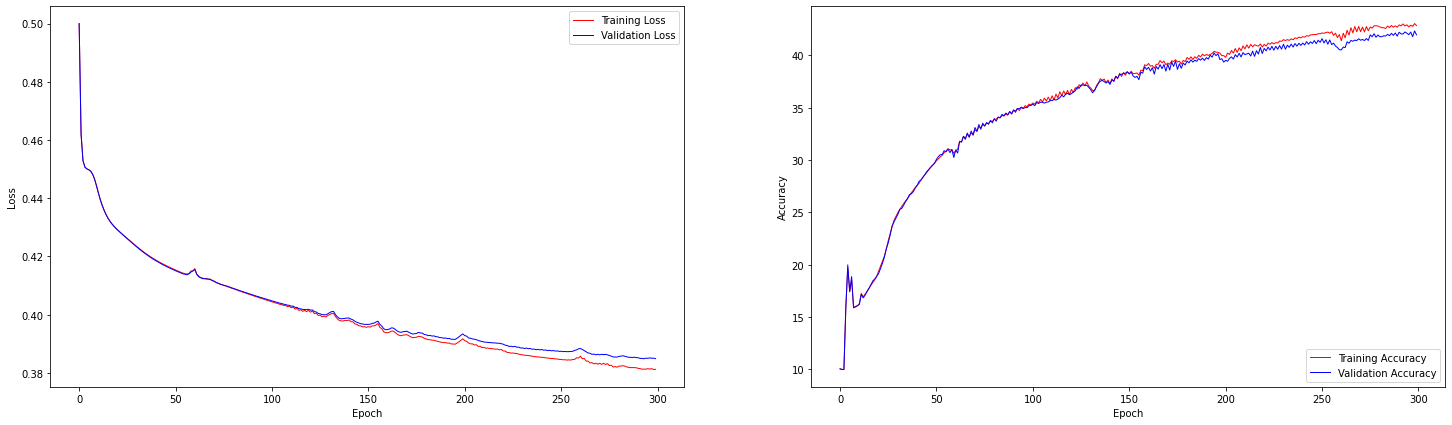

In [16]:
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(25,7))
items = {"Training Loss":History[0], "Validation Loss":History[1], "Training Accuracy":History[2], "Validation Accuracy": History[3]}

plt.subplot(1,2,1);
plt.plot(items['Training Loss'], color ='r', linewidth=1, label ='Training Loss');
plt.plot(items['Validation Loss'], color ='b', linewidth=1, label = 'Validation Loss');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend(loc='upper right');

plt.subplot(1,2,2);
plt.plot(items['Training Accuracy'], color ='r', linewidth=1, label ='Training Accuracy');
plt.plot(items['Validation Accuracy'], color ='b', linewidth=1, label = 'Validation Accuracy');
plt.xlabel('Epoch');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.show()


# Part 3

Modify the code in item 2 to carry out stochastic gradient descent with a batch size of 500. 

(a) Report training and testing loss and accuracies.

(b) Compare results with item 2 (justify).

In [17]:
def CustomNNwithMiniBatchSGD(batch_size = 500,val_batch_size=10000, epochs = 300, lr = 0.01, lr_decay = 0.999, reg = 5):

  std=1e-5
  w1 = std*np.random.randn(Din, 200)
  b1 = np.zeros(200)
  w2 = std*np.random.randn(200, 10)
  b2 = np.zeros(10)

  train_loss_history = []
  val_loss_history = []
  train_acc_history = []
  val_acc_history = []
  total_training_samples = 50000

  seed = 0
  rng = np.random.default_rng(seed=seed)
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  batch_indices = batching(indices, batch_size) #A Helper function called to batch the given data

  for epoch in range(1,epochs+1):
    train_loss_per_iteration = []
    train_acc_per_iteration = []

    for batch_indice in batch_indices: #Running Through each batch 
      x = x_train[batch_indice]
      y = y_train[batch_indice]

      h = 1./(1.+np.exp(-(x.dot(w1)+b1)))
      y_pred = h.dot(w2)+b2
      train_loss = MSE_with_reg(y_pred,y,batch_size,reg,[w1,w2])
      train_loss_per_iteration.append(train_loss)
      train_acc = find_accuracy(y_pred, y)
      train_acc_per_iteration.append(train_acc)

      dy = 1.0/batch_size*(y_pred-y)
      dw2 = h.T.dot(dy) + 1./batch_size*reg*w2
      w2 -= lr*dw2
      db2 = dy.sum(axis = 0)
      b2 -= lr*db2
      dh = dy.dot(w2.T)
      dw1 = x.T.dot(dh*h*(1-h)) + 1./batch_size*reg*w1
      w1 -= lr*dw1
      db1 = (dh*h*(1-h)).sum(axis =0)
      b1 -= lr*db1
  
    lr *= lr_decay

    h_val = 1./(1.+np.exp(-(x_test.dot(w1)+b1)))
    y_pred_val = h_val.dot(w2)+b2

    val_loss = MSE_with_reg(y_pred_val,y_test,val_batch_size, reg = 0, weights=[])
    val_loss_history.append(val_loss)
    val_acc = find_accuracy(y_pred_val, y_test)
    val_acc_history.append(val_acc)

    train_loss_per_epoch = sum(train_loss_per_iteration)/len(train_loss_per_iteration)
    train_loss_history.append(train_loss_per_epoch)
    train_acc_per_epoch = sum(train_acc_per_iteration)/len(train_acc_per_iteration)
    train_acc_history.append(train_acc_per_epoch)

    if epoch%10 ==0 or epoch == epochs:
      print('Epoch %d/%d: Train Loss: %f, Val Loss: %f,  Training Accuracy: %f, Validation Accuracy: %f'%(epoch, epochs,train_loss_per_epoch, val_loss, train_acc_per_epoch, val_acc))

  return (train_loss_history, val_loss_history, train_acc_history, val_acc_history, [w1,w2]);


In [18]:
History = CustomNNwithMiniBatchSGD()

Epoch 10/300: Train Loss: 0.361014, Val Loss: 0.374418,  Training Accuracy: 48.638000, Validation Accuracy: 44.340000
Epoch 20/300: Train Loss: 0.340536, Val Loss: 0.370858,  Training Accuracy: 55.170000, Validation Accuracy: 45.580000
Epoch 30/300: Train Loss: 0.328126, Val Loss: 0.377011,  Training Accuracy: 60.120000, Validation Accuracy: 44.780000
Epoch 40/300: Train Loss: 0.319937, Val Loss: 0.382284,  Training Accuracy: 63.714000, Validation Accuracy: 44.400000
Epoch 50/300: Train Loss: 0.314245, Val Loss: 0.386388,  Training Accuracy: 66.490000, Validation Accuracy: 43.670000
Epoch 60/300: Train Loss: 0.308574, Val Loss: 0.387391,  Training Accuracy: 68.980000, Validation Accuracy: 43.820000
Epoch 70/300: Train Loss: 0.305335, Val Loss: 0.391330,  Training Accuracy: 70.680000, Validation Accuracy: 43.810000
Epoch 80/300: Train Loss: 0.303081, Val Loss: 0.392643,  Training Accuracy: 71.996000, Validation Accuracy: 44.020000
Epoch 90/300: Train Loss: 0.300912, Val Loss: 0.394548, 

In [19]:
mean_train_loss = sum(History[0])/len(History[0])
mean_val_loss =sum(History[1])/len(History[1])
mean_train_acc =sum(History[2])/len(History[2])
mean_val_acc =sum(History[3])/len(History[3])
print('Average Train Loss: %f, Average Val Loss: %f,  Average Training Accuracy: %f, Average Validation Accuracy: %f'%(mean_train_loss, mean_val_loss, mean_train_acc, mean_val_acc))


Average Train Loss: 0.300923, Average Val Loss: 0.402110,  Average Training Accuracy: 73.966267, Average Validation Accuracy: 42.876267


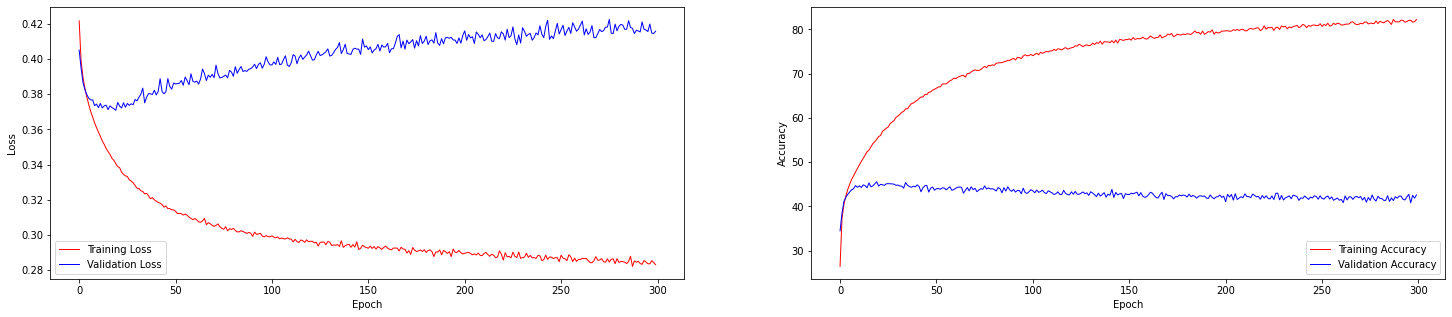

In [20]:
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(25,5))
items = {"Training Loss":History[0], "Validation Loss":History[1], "Training Accuracy":History[2], "Validation Accuracy": History[3]}

plt.subplot(1,2,1);
plt.plot(items['Training Loss'], color ='r', linewidth=1, label ='Training Loss');
plt.plot(items['Validation Loss'], color ='b', linewidth=1, label = 'Validation Loss');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend(loc='lower left');

plt.subplot(1,2,2);
plt.plot(items['Training Accuracy'], color ='r', linewidth=1, label ='Training Accuracy');
plt.plot(items['Validation Accuracy'], color ='b', linewidth=1, label = 'Validation Accuracy');
plt.xlabel('Epoch');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.show()

#Part 4


Construct a CNN using Keras.models.Sequential (with the following configuration: C32, C64,
C64, F64, F10. All three convolutions layers are 3×3. Max pooling (2×2) follows each convolution layer.
Use SDG (with momentum) with a batch size of 50 and CategoricalCrossentropy as the loss.

(a) How many learnable parameters are there in this network?

(b) Report the parameters such as the learning rate and momentum.

(c) Report training and testing loss and accuracies.


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (32,32,3)),
                    MaxPooling2D(pool_size=2),
                    Conv2D(64, kernel_size = 3, activation = 'relu'),
                    MaxPooling2D(pool_size=2),
                    Conv2D(64, kernel_size = 3, activation = 'relu'),
                    MaxPooling2D(pool_size=2),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [4]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels,batch_size=50, epochs=100, 
                    validation_data=(test_images, test_labels),
                    callbacks=[
                               EarlyStopping(monitor='val_accuracy', min_delta=0.005, 
                                             patience=4, verbose=1, mode='auto',
                                             restore_best_weights=True)])

Epoch 1/100
1000/1000 [==============================] - 16s 4ms/step - loss: 2.0044 - accuracy: 0.2502 - val_loss: 1.3799 - val_accuracy: 0.5011
Epoch 2/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3413 - accuracy: 0.5195 - val_loss: 1.2256 - val_accuracy: 0.5699
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1502 - accuracy: 0.5928 - val_loss: 1.0866 - val_accuracy: 0.6201
Epoch 4/100
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0246 - accuracy: 0.6412 - val_loss: 1.0426 - val_accuracy: 0.6339
Epoch 5/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9282 - accuracy: 0.6747 - val_loss: 0.9816 - val_accuracy: 0.6576
Epoch 6/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.8439 - accuracy: 0.7064 - val_loss: 0.9384 - val_accuracy: 0.6722
Epoch 7/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7856 - accuracy: 0.7240 - val_loss: 0.9447 - val_a

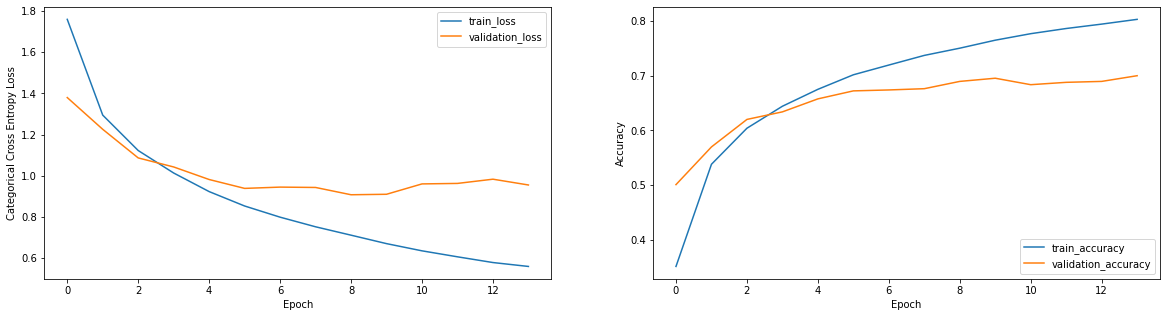

In [12]:
fig,axes = plt.subplots(1,2,figsize=(20,5))

axes[0].plot(history.history['loss'], label='train_loss')
axes[0].plot(history.history['val_loss'], label = 'validation_loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Categorical Cross Entropy Loss')
axes[0].legend(loc='upper right')

axes[1].plot(history.history['accuracy'], label='train_accuracy')
axes[1].plot(history.history['val_accuracy'], label = 'validation_accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='lower right');

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

my_model = Sequential([Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape = (32,32,3)),
                    Conv2D(32, kernel_size = 3, activation = 'relu',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=2),
                    Dropout(0.2),

                    Conv2D(64, kernel_size = 3, activation = 'relu', padding='same'),
                    Conv2D(64, kernel_size = 3, activation = 'relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=2),
                    Dropout(0.3),

                    Conv2D(128, kernel_size = 3, activation = 'relu', padding='same'),
                    Conv2D(128, kernel_size = 3, activation = 'relu', padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=2),
                    Dropout(0.4),

                    Flatten(),
                    Dense(256, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.6),
                    Dense(10, activation='softmax')])
my_model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [8]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

my_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.9),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

my_history = my_model.fit(train_images, train_labels,batch_size=50, epochs=100, 
                    validation_data=(test_images, test_labels),
                    callbacks=[ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, 
                                                 verbose=1,patience=2, min_lr=0.001),
                               EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=10, 
                                             verbose=1, mode='auto', restore_best_weights=True)])



Epoch 1/100
1000/1000 [==============================] - 9s 8ms/step - loss: 2.5782 - accuracy: 0.2219 - val_loss: 1.6983 - val_accuracy: 0.3779
Epoch 2/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.6965 - accuracy: 0.3782 - val_loss: 1.5499 - val_accuracy: 0.4357
Epoch 3/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.5256 - accuracy: 0.4447 - val_loss: 1.4230 - val_accuracy: 0.4788
Epoch 4/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.4186 - accuracy: 0.4858 - val_loss: 1.2455 - val_accuracy: 0.5483
Epoch 5/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.2998 - accuracy: 0.5336 - val_loss: 1.1265 - val_accuracy: 0.5961
Epoch 6/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.1827 - accuracy: 0.5778 - val_loss: 1.1439 - val_accuracy: 0.5896
Epoch 7/100
1000/1000 [==============================] - 7s 7ms/step - loss: 1.1083 - accuracy: 0.6041 - val_loss: 0.9520 - val_ac

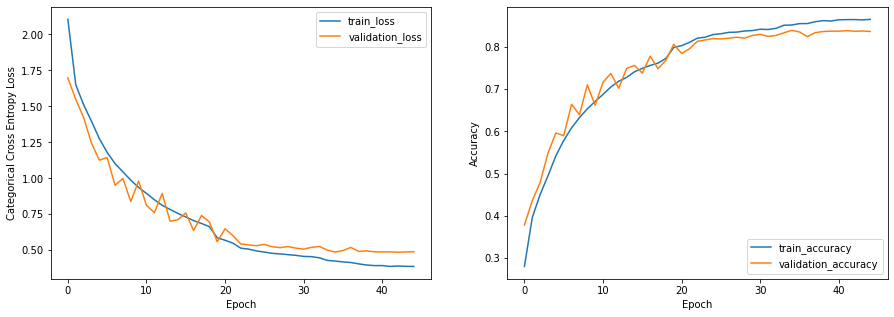

In [9]:
fig,axes = plt.subplots(1,2,figsize=(15,5))

axes[0].plot(my_history.history['loss'], label='train_loss')
axes[0].plot(my_history.history['val_loss'], label = 'validation_loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Categorical Cross Entropy Loss')
axes[0].legend(loc='upper right')

axes[1].plot(my_history.history['accuracy'], label='train_accuracy')
axes[1].plot(my_history.history['val_accuracy'], label = 'validation_accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='lower right');